In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Here a slightly different preprocessing is done in order to engineer features and obtain more visualizations

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Carol-Kelly/Hamoye-Data-Warehouse-ProjectTeam/main/original_earnings%20dataset.csv",
                 delimiter=',', index_col=0)
df.head()

,year,females,female managers,female professionals,female technicians and trades workers,female community and personal service workers,female clerical and administrative workers,female sales workers,female machinery operators and drivers,female labourers,...,male labourers,persons,person managers,person professionals,person technicians and trades workers,person community and personal service workers,person clerical and administrative workers,person sales workers,person machinery operators and drivers,person labourers
0,2004,Females,26.14,29.02,17.90,18.01,19.98,14.79,16.27,16.48,...,17.21,Persons,30.60,31.22,21.58,19.03,20.80,16.13,20.39,16.95
1,2005,Females,28.10,30.00,18.86,18.20,20.95,15.39,21.49,16.71,...,17.85,Persons,31.37,31.91,21.42,19.60,21.71,16.70,21.09,17.44
2,2006,Females,28.60,30.56,19.64,18.84,21.73,16.19,17.37,16.32,...,18.18,Persons,32.82,32.28,22.18,20.04,22.82,17.57,21.00,17.48
3,2007,Females,36.43,31.93,20.98,19.85,23.27,16.78,18.04,17.54,...,19.68,Persons,37.95,35.01,23.52,21.32,24.61,18.28,22.55,18.88
4,2008,Females,32.68,32.93,20.30,20.97,23.67,17.44,20.27,17.27,...,19.79,Persons,36.24,35.84,24.19,24.25,24.76,19.34,23.33,18.85


In [3]:
df_clean = df.copy()

In [4]:
# Separate the dataset into male_df, female_df and person_df
df_clean.set_index('year', inplace=True)
total_category = df_clean.T
total_category

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
females,Females,Females,Females,Females,Females,Females,Females,Females,Females,Females,Females,Females,Females,Females
female managers,26.14,28.1,28.6,36.43,32.68,33.3,34.41,35.22,36.24,37.26,42.63,42.12,44.35,46.02
female professionals,29.02,30.0,30.56,31.93,32.93,34.72,35.52,36.48,37.72,38.95,44.13,44.75,45.17,47.04
female technicians and trades workers,17.9,18.86,19.64,20.98,20.3,20.19,22.86,23.19,23.95,23.9,27.86,27.5,26.28,28.3
female community and personal service workers,18.01,18.2,18.84,19.85,20.97,21.0,21.97,23.25,23.52,24.5,25.01,26.87,26.54,27.84
female clerical and administrative workers,19.98,20.95,21.73,23.27,23.67,23.81,25.74,26.85,28.35,28.38,31.52,31.68,32.35,33.54
female sales workers,14.79,15.39,16.19,16.78,17.44,18.02,19.15,19.87,20.82,21.61,22.28,22.99,23.39,26.11
female machinery operators and drivers,16.27,21.49,17.37,18.04,20.27,21.46,22.74,22.92,24.46,25.02,29.84,31.91,29.73,30.07
female labourers,16.48,16.71,16.32,17.54,17.27,17.9,19.18,19.82,20.99,21.75,22.64,23.66,24.19,24.9
males,Males,Males,Males,Males,Males,Males,Males,Males,Males,Males,Males,Males,Males,Males


In [5]:
#Extract the male features only from the datasets
df_males = total_category[9:18]
df_males

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
males,Males,Males,Males,Males,Males,Males,Males,Males,Males,Males,Males,Males,Males,Males
male managers,33.02,33.13,35.16,38.85,38.34,41.67,41.28,43.87,44.24,44.85,49.55,49.02,49.77,52.51
male professionals,34.03,34.2,34.34,38.85,39.4,40.12,41.49,45.78,45.24,45.03,50.45,51.05,49.49,52.91
male technicians and trades workers,22.15,21.87,22.64,23.97,24.81,26.62,27.95,29.26,30.94,30.82,31.95,33.27,31.97,34.25
male community and personal service workers,21.18,22.52,22.74,24.56,31.35,25.1,26.99,26.41,29.03,29.2,31.96,30.74,33.35,32.63
male clerical and administrative workers,23.19,23.94,26.15,28.52,28.04,28.25,30.69,32.77,32.9,33.88,35.85,35.72,37.77,39.4
male sales workers,18.51,19.01,19.99,20.82,22.58,21.6,23.22,23.99,24.49,24.55,25.99,26.89,29.62,29.28
male machinery operators and drivers,20.92,21.04,21.36,23.06,23.7,25.44,27.25,27.16,28.88,29.83,30.48,30.92,29.65,33.12
male labourers,17.21,17.85,18.18,19.68,19.79,19.96,21.69,22.16,24.18,24.25,25.22,24.73,25.64,27.28


In [6]:
males_df = df_males.T
males_df.reset_index(inplace = True)
males_df.head()

,year,males,male managers,male professionals,male technicians and trades workers,male community and personal service workers,male clerical and administrative workers,male sales workers,male machinery operators and drivers,male labourers
0,2004,Males,33.02,34.03,22.15,21.18,23.19,18.51,20.92,17.21
1,2005,Males,33.13,34.2,21.87,22.52,23.94,19.01,21.04,17.85
2,2006,Males,35.16,34.34,22.64,22.74,26.15,19.99,21.36,18.18
3,2007,Males,38.85,38.85,23.97,24.56,28.52,20.82,23.06,19.68
4,2008,Males,38.34,39.4,24.81,31.35,28.04,22.58,23.7,19.79


In [7]:
males_df.rename(columns ={ 'males':'gender'}, inplace=True)

In [8]:
columns_list = []
for column in males_df.columns:
    if 'male' not in column:
        columns_list.append(column)
    else:
        new = column.replace('male', '')
        columns_list.append(new)
print(columns_list)

['year', 'gender', ' managers', ' professionals', ' technicians and trades workers', ' community and personal service workers', ' clerical and administrative workers', ' sales workers', ' machinery operators and drivers', ' labourers']


In [9]:
males_df.columns = columns_list
males_df.head()

,year,gender,managers,professionals,technicians and trades workers,community and personal service workers,clerical and administrative workers,sales workers,machinery operators and drivers,labourers
0,2004,Males,33.02,34.03,22.15,21.18,23.19,18.51,20.92,17.21
1,2005,Males,33.13,34.2,21.87,22.52,23.94,19.01,21.04,17.85
2,2006,Males,35.16,34.34,22.64,22.74,26.15,19.99,21.36,18.18
3,2007,Males,38.85,38.85,23.97,24.56,28.52,20.82,23.06,19.68
4,2008,Males,38.34,39.4,24.81,31.35,28.04,22.58,23.7,19.79


In [10]:
#Extract the females features only from the datasets
df_females = total_category[0:9]
#df_females=df_females.drop('females', axis=0)
df_females

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
females,Females,Females,Females,Females,Females,Females,Females,Females,Females,Females,Females,Females,Females,Females
female managers,26.14,28.1,28.6,36.43,32.68,33.3,34.41,35.22,36.24,37.26,42.63,42.12,44.35,46.02
female professionals,29.02,30.0,30.56,31.93,32.93,34.72,35.52,36.48,37.72,38.95,44.13,44.75,45.17,47.04
female technicians and trades workers,17.9,18.86,19.64,20.98,20.3,20.19,22.86,23.19,23.95,23.9,27.86,27.5,26.28,28.3
female community and personal service workers,18.01,18.2,18.84,19.85,20.97,21.0,21.97,23.25,23.52,24.5,25.01,26.87,26.54,27.84
female clerical and administrative workers,19.98,20.95,21.73,23.27,23.67,23.81,25.74,26.85,28.35,28.38,31.52,31.68,32.35,33.54
female sales workers,14.79,15.39,16.19,16.78,17.44,18.02,19.15,19.87,20.82,21.61,22.28,22.99,23.39,26.11
female machinery operators and drivers,16.27,21.49,17.37,18.04,20.27,21.46,22.74,22.92,24.46,25.02,29.84,31.91,29.73,30.07
female labourers,16.48,16.71,16.32,17.54,17.27,17.9,19.18,19.82,20.99,21.75,22.64,23.66,24.19,24.9


In [11]:
females_df = df_females.T
females_df.reset_index(inplace = True)
females_df.head()

,year,females,female managers,female professionals,female technicians and trades workers,female community and personal service workers,female clerical and administrative workers,female sales workers,female machinery operators and drivers,female labourers
0,2004,Females,26.14,29.02,17.9,18.01,19.98,14.79,16.27,16.48
1,2005,Females,28.1,30.0,18.86,18.2,20.95,15.39,21.49,16.71
2,2006,Females,28.6,30.56,19.64,18.84,21.73,16.19,17.37,16.32
3,2007,Females,36.43,31.93,20.98,19.85,23.27,16.78,18.04,17.54
4,2008,Females,32.68,32.93,20.3,20.97,23.67,17.44,20.27,17.27


In [12]:
females_df.columns = columns_list

In [13]:
females_df.head()

,year,gender,managers,professionals,technicians and trades workers,community and personal service workers,clerical and administrative workers,sales workers,machinery operators and drivers,labourers
0,2004,Females,26.14,29.02,17.9,18.01,19.98,14.79,16.27,16.48
1,2005,Females,28.1,30.0,18.86,18.2,20.95,15.39,21.49,16.71
2,2006,Females,28.6,30.56,19.64,18.84,21.73,16.19,17.37,16.32
3,2007,Females,36.43,31.93,20.98,19.85,23.27,16.78,18.04,17.54
4,2008,Females,32.68,32.93,20.3,20.97,23.67,17.44,20.27,17.27


In [14]:
#Extract the persons features only from the datasets
df_persons = total_category[18:]
#df_persons=df_persons.drop('persons', axis=0)
df_persons

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons
person managers,30.6,31.37,32.82,37.95,36.24,38.57,38.73,40.62,41.28,41.99,46.88,46.21,47.66,49.8
person professionals,31.22,31.91,32.28,35.01,35.84,37.1,38.14,40.65,41.07,41.66,46.92,47.53,47.03,49.56
person technicians and trades workers,21.58,21.42,22.18,23.52,24.19,25.68,27.23,28.42,29.9,29.81,31.34,32.39,31.04,33.36
person community and personal service workers,19.03,19.6,20.04,21.32,24.25,22.25,23.5,24.26,25.25,25.88,27.16,28.11,28.68,29.28
person clerical and administrative workers,20.8,21.71,22.82,24.61,24.76,24.93,27.04,28.31,29.47,29.84,32.56,32.69,33.76,35.01
person sales workers,16.13,16.7,17.57,18.28,19.34,19.38,20.58,21.41,22.16,22.67,23.59,24.38,25.79,27.31
person machinery operators and drivers,20.39,21.09,21.0,22.55,23.33,25.05,26.82,26.74,28.52,29.36,30.42,31.02,29.66,32.84
person labourers,16.95,17.44,17.48,18.88,18.85,19.21,20.83,21.32,22.99,23.32,24.29,24.36,25.14,26.44


In [15]:
persons_df = df_persons.T
persons_df.reset_index(inplace = True)
persons_df.head()

,year,persons,person managers,person professionals,person technicians and trades workers,person community and personal service workers,person clerical and administrative workers,person sales workers,person machinery operators and drivers,person labourers
0,2004,Persons,30.6,31.22,21.58,19.03,20.8,16.13,20.39,16.95
1,2005,Persons,31.37,31.91,21.42,19.6,21.71,16.7,21.09,17.44
2,2006,Persons,32.82,32.28,22.18,20.04,22.82,17.57,21.0,17.48
3,2007,Persons,37.95,35.01,23.52,21.32,24.61,18.28,22.55,18.88
4,2008,Persons,36.24,35.84,24.19,24.25,24.76,19.34,23.33,18.85


In [16]:
persons_df.columns = columns_list
persons_df.head()

,year,gender,managers,professionals,technicians and trades workers,community and personal service workers,clerical and administrative workers,sales workers,machinery operators and drivers,labourers
0,2004,Persons,30.6,31.22,21.58,19.03,20.8,16.13,20.39,16.95
1,2005,Persons,31.37,31.91,21.42,19.6,21.71,16.7,21.09,17.44
2,2006,Persons,32.82,32.28,22.18,20.04,22.82,17.57,21.0,17.48
3,2007,Persons,37.95,35.01,23.52,21.32,24.61,18.28,22.55,18.88
4,2008,Persons,36.24,35.84,24.19,24.25,24.76,19.34,23.33,18.85


In [17]:
# concatenate the dataframes to one
df_clean = pd.concat([males_df, females_df, persons_df], axis =0)
df_clean.shape

(42, 10)

In [18]:
df_clean.columns

Index(['year', 'gender', ' managers', ' professionals',
       ' technicians and trades workers',
       ' community and personal service workers',
       ' clerical and administrative workers', ' sales workers',
       ' machinery operators and drivers', ' labourers'],
      dtype='object')

In [19]:
df_clean = df_clean.melt(id_vars=['year', 'gender'], var_name= 'job_type', value_name='earning_per_hour')
                         
df_clean.shape

(336, 4)

In [20]:
df_clean

,year,gender,job_type,earning_per_hour
0,2004,Males,managers,33.02
1,2005,Males,managers,33.13
2,2006,Males,managers,35.16
3,2007,Males,managers,38.85
4,2008,Males,managers,38.34
...,...,...,...,...
331,2013,Persons,labourers,23.32
332,2014,Persons,labourers,24.29
333,2015,Persons,labourers,24.36
334,2016,Persons,labourers,25.14


In [21]:
df_clean.sort_values("year")

,year,gender,job_type,earning_per_hour
0,2004,Males,managers,33.02
224,2004,Females,sales workers,14.79
210,2004,Males,sales workers,18.51
28,2004,Persons,managers,30.6
182,2004,Females,clerical and administrative workers,19.98
...,...,...,...,...
251,2017,Persons,sales workers,27.31
265,2017,Males,machinery operators and drivers,33.12
279,2017,Females,machinery operators and drivers,30.07
307,2017,Males,labourers,27.28


In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              336 non-null    int64 
 1   gender            336 non-null    object
 2   job_type          336 non-null    object
 3   earning_per_hour  336 non-null    object
dtypes: int64(1), object(3)
memory usage: 10.6+ KB


#### More Analysis

In [23]:
total_gender = df_clean.groupby('gender')['earning_per_hour'].mean()
total_gender = total_gender.reset_index()
total_gender.head()

,gender,earning_per_hour
0,Females,26.054375
1,Males,30.590268
2,Persons,28.457143


Text(0.5, 1.0, 'Average Hourly Earnings of the Various Gender')

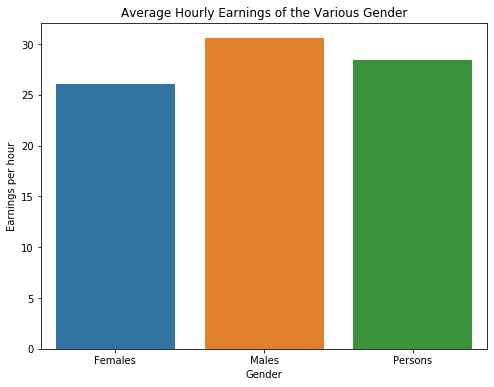

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(data = total_gender, x= 'gender', y = 'earning_per_hour')
plt.xlabel('Gender')
plt.ylabel('Earnings per hour')
plt.title('Average Hourly Earnings of the Various Gender')

The figure above shows the average houly earning of the eight cadres over the total period of analysis (2004 - 2017) for the various gender. The male gender receives the highest hourly wage of AUD30.59 while the female gender receives the least of AUD26.05.

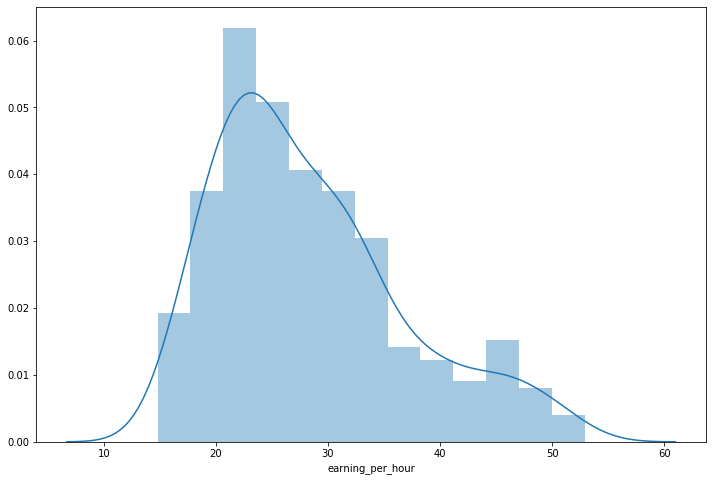

In [25]:
plt.figure(figsize=(12, 8))
sns.distplot(df_clean['earning_per_hour'], kde= True)

From the visualization above, it can be seen that overall, irrespective of cadre, most employees in Australia earn an average hourly wage of about AUD25. 

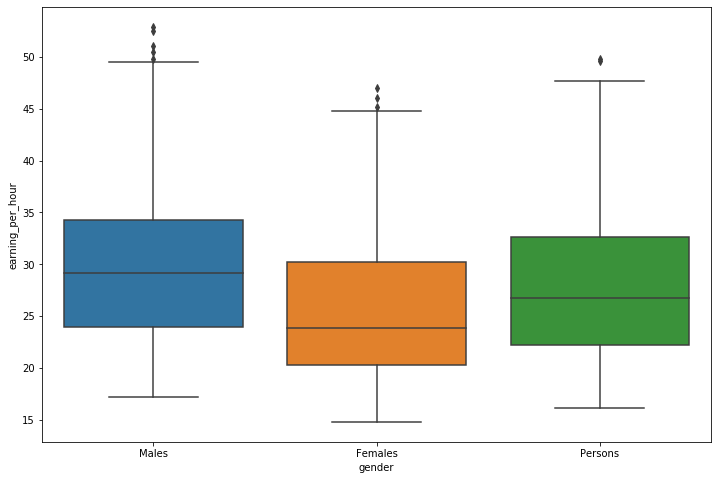

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(data= df_clean, y = 'earning_per_hour', x= 'gender')

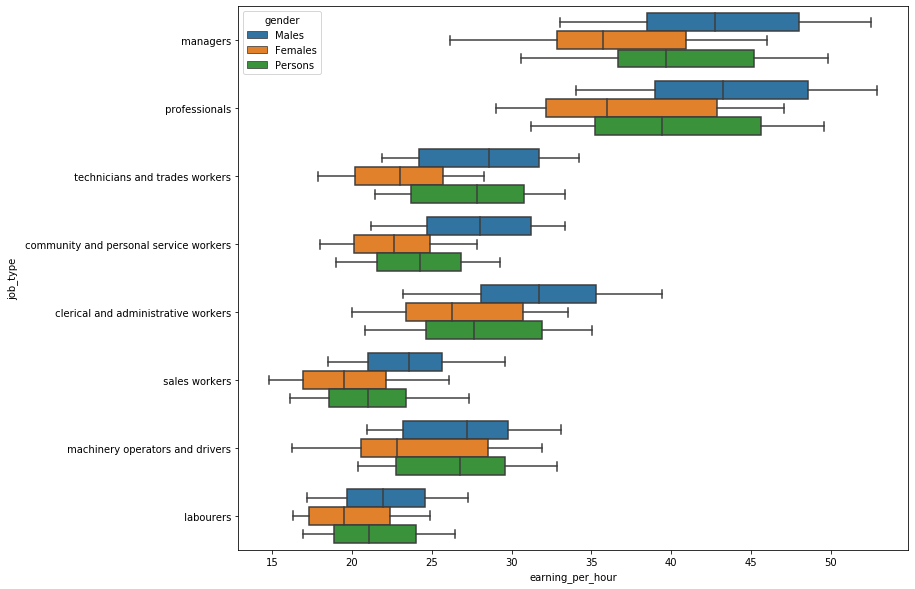

In [27]:
plt.figure(figsize=(12, 10))
sns.boxplot(data= df_clean, x = 'earning_per_hour', y= 'job_type', hue = 'gender')

In the first boxplot where the dataset was divided according to gender, there were outliers; but when the plot was further divided taking into account the various cadres occupied by the gender, there are no more outliers. Signifying that all earnings, regardless of job titles are within range.

### Feature Engineering
Creating our target variable, wage-gap.

In [28]:
df_clean.head()

,year,gender,job_type,earning_per_hour
0,2004,Males,managers,33.02
1,2005,Males,managers,33.13
2,2006,Males,managers,35.16
3,2007,Males,managers,38.85
4,2008,Males,managers,38.34


In [29]:
# Query out male and female data
male_data = df_clean.query('gender == "Males"')
female_data = df_clean.query('gender == "Females"')
print(male_data.shape, female_data.shape)

(112, 4) (112, 4)


In [30]:
# create an average hourly wage in each year for both male and female
male_data = male_data.groupby('year')['earning_per_hour'].mean()
male_data =male_data.reset_index()
male_data=male_data.rename(columns = {'earning_per_hour':'male_hourly_wage'})
female_data = female_data.groupby('year')['earning_per_hour'].mean()
female_data = female_data.reset_index()
female_data= female_data.rename(columns = {'earning_per_hour':'female_hourly_wage'})


In [31]:
data = male_data.merge(female_data, on = 'year', how ='outer')
data

,year,male_hourly_wage,female_hourly_wage
0,2004,23.77625,19.82375
1,2005,24.19500,21.21250
2,2006,25.07000,21.15625
3,2007,27.28875,23.10250
4,2008,28.50125,23.19125
5,2009,28.59500,23.80000
6,2010,30.07000,25.19625
7,2011,31.42500,25.95000
8,2012,32.48750,27.00625
9,2013,32.80125,27.67125


In [32]:
# create the hourly wage gap between male and female
data['wage_gap'] = data.male_hourly_wage - data.female_hourly_wage
data

,year,male_hourly_wage,female_hourly_wage,wage_gap
0,2004,23.77625,19.82375,3.95250
1,2005,24.19500,21.21250,2.98250
2,2006,25.07000,21.15625,3.91375
3,2007,27.28875,23.10250,4.18625
4,2008,28.50125,23.19125,5.31000
5,2009,28.59500,23.80000,4.79500
6,2010,30.07000,25.19625,4.87375
7,2011,31.42500,25.95000,5.47500
8,2012,32.48750,27.00625,5.48125
9,2013,32.80125,27.67125,5.13000


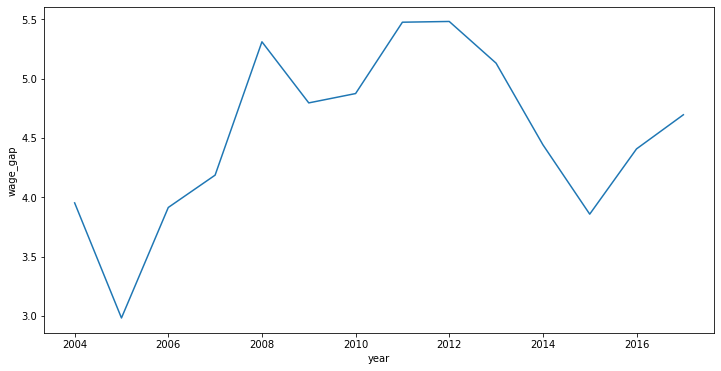

In [33]:
plt.figure(figsize=(12, 6))
sns.lineplot(data =data, x ='year', y ='wage_gap')

In [34]:
data.index = pd.to_datetime(data.index)

<Figure size 864x576 with 0 Axes>

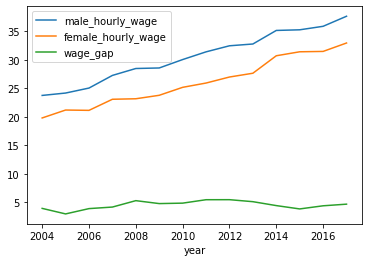

In [35]:
%matplotlib inline 
plt.figure(figsize=(12,8))
data.set_index('year').plot()

We realize the wage gap has been on a steady trend around 5 dollars in hourly wage. We can easily infer that this data doesn't have seasonality. The wage_gap is independent of time.

### Time Series Analysis and Modeling  (The Box - Jenkins Method)

**Using the ARIMA model** 

In [36]:
data.year = data.year.astype('str')
data.year = data.year + '-01-01 00:00:00'
data.head()

,year,male_hourly_wage,female_hourly_wage,wage_gap
1970-01-01 00:00:00.000000000,2004-01-01 00:00:00,23.77625,19.82375,3.95250
1970-01-01 00:00:00.000000001,2005-01-01 00:00:00,24.19500,21.21250,2.98250
1970-01-01 00:00:00.000000002,2006-01-01 00:00:00,25.07000,21.15625,3.91375
1970-01-01 00:00:00.000000003,2007-01-01 00:00:00,27.28875,23.10250,4.18625
1970-01-01 00:00:00.000000004,2008-01-01 00:00:00,28.50125,23.19125,5.31000


In [37]:
data.year = pd.to_datetime(data.year)
data.set_index( "year" , inplace= True)
data.head()

,male_hourly_wage,female_hourly_wage,wage_gap
year,,,
2004-01-01,23.77625,19.82375,3.95250
2005-01-01,24.19500,21.21250,2.98250
2006-01-01,25.07000,21.15625,3.91375
2007-01-01,27.28875,23.10250,4.18625
2008-01-01,28.50125,23.19125,5.31000


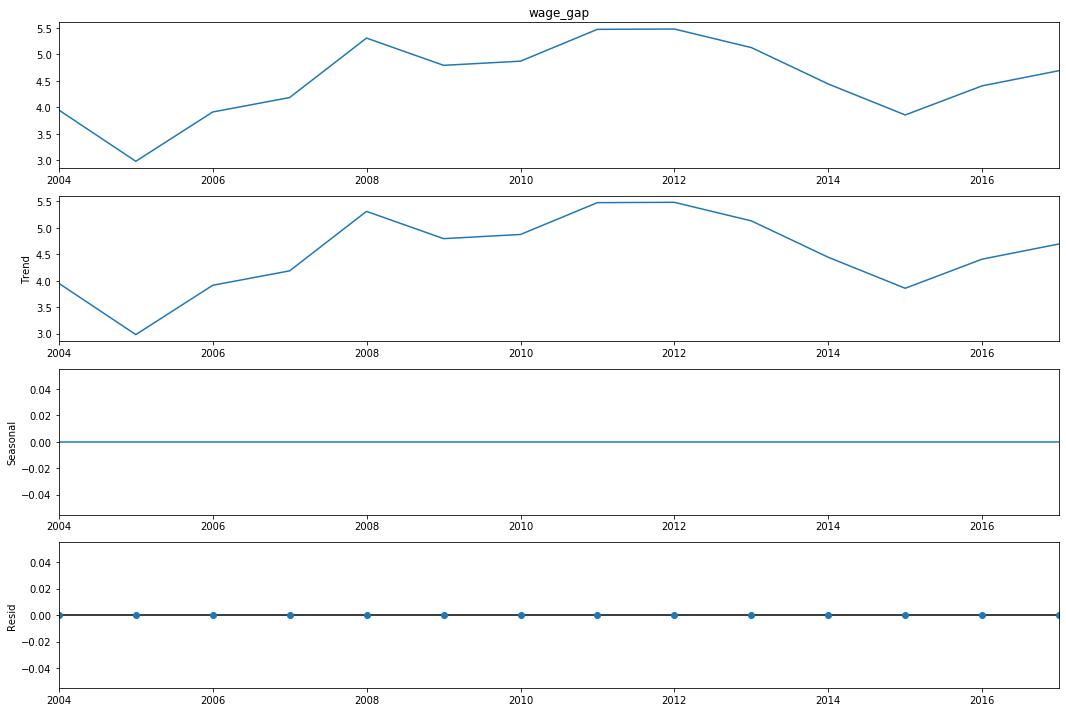

In [38]:
import statsmodels.api as sm
from pylab import rcParams

rcParams[ 'figure.figsize' ] = 15 , 10
decompose_series = sm.tsa.seasonal_decompose(data['wage_gap'], model= 'additive' )
decompose_series.plot()
plt.show()

In [39]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(data.wage_gap)
print(f'ADF Statistic: {adf_result[ 0 ]} ' )
print(f'p-value: {adf_result[ 1 ]} ' )
print(f'No. of lags used: {adf_result[ 2 ]} ' )
print(f'No. of observations used : {adf_result[ 3 ]} ' )
print('Critical Values:' )
for k, v in adf_result[ 4 ].items():
 print( f' {k} : {v} ' )

ADF Statistic: -2.648235507476748 
p-value: 0.08343201883490126 
No. of lags used: 5 
No. of observations used : 8 
Critical Values:
 1% : -4.6651863281249994 
 5% : -3.3671868750000002 
 10% : -2.802960625 


The result shows that the p-value is greater than the critical value at a 5% significance level and the ADF statistic is greater than any of the critical values obtained. Therfore, the series is non-stationary.  

In [40]:
import pmdarima
from pmdarima.arima import auto_arima

# estimate ARIMA differencing term, d
pmdarima.arima.ndiffs(x=data['wage_gap'], alpha=0.05, test='adf', max_d=10)

6

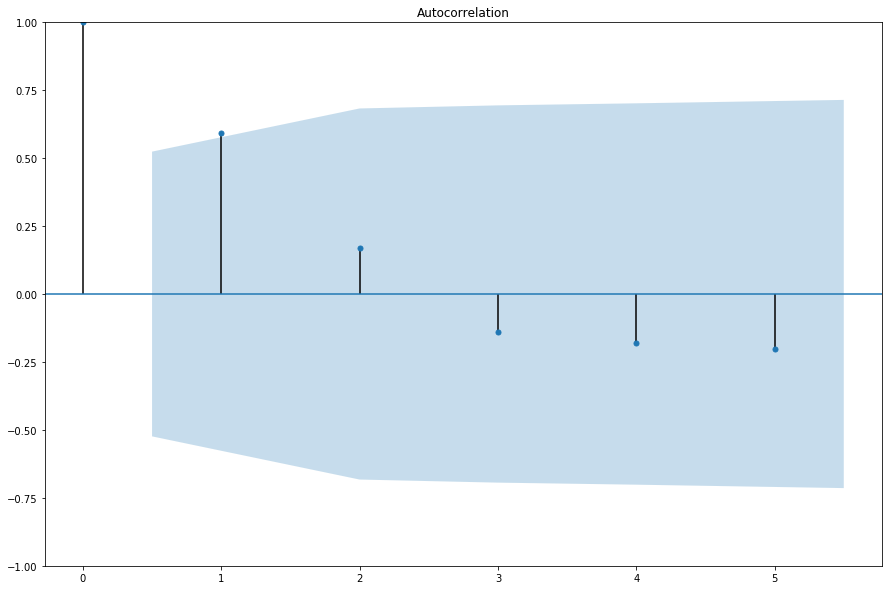

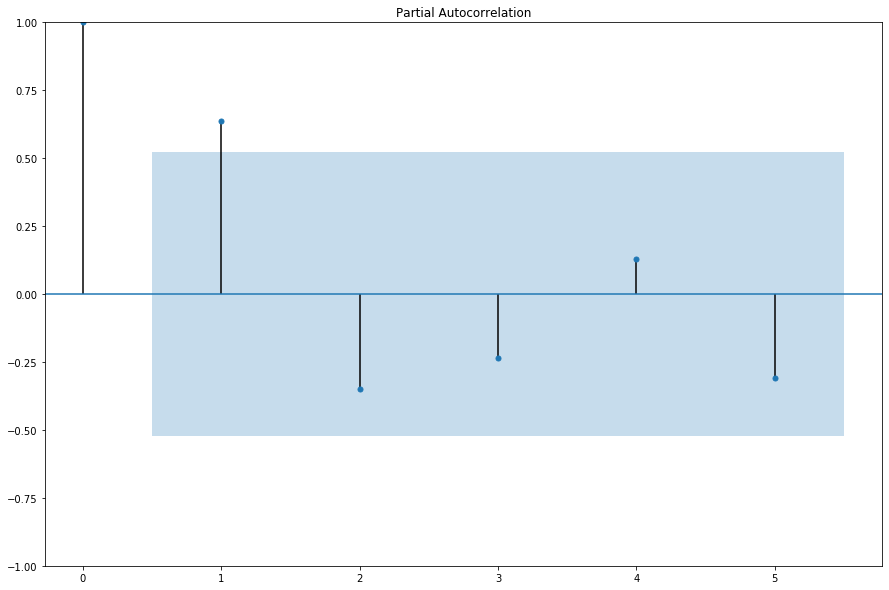

In [41]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

#ACF
plot_acf(data['wage_gap'], lags=range(0 , 6))
plt.show()
#PACF
plot_pacf(data['wage_gap'], lags=range(0 , 6))
plt.show()

In the ACF plot, only lag 1 crosses the significant level; hence, q=1. Similarly, in the PACF plot, p=1. Therefore, the ARIMA order is (1,6,1)

In [42]:
from pmdarima.model_selection import train_test_split

# split the dataset
train, test = train_test_split(data, train_size=6)

In [43]:
# Fit your model
model = pmdarima.auto_arima(train.values.ravel(), seasonal=False, m=1, suppress_warnings=True, trace=True, stationary=False,
                            d=6, max_d=6, start_p=0, start_q=0, alpha=0.05, test='adf',information_criterion='aic',
                            transparams=True, stepwise=True)
                           
model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,6,0)(0,0,0)[0]             : AIC=170.194, Time=0.49 sec
 ARIMA(1,6,0)(0,0,0)[0]             : AIC=168.873, Time=0.06 sec
 ARIMA(0,6,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,6,0)(0,0,0)[0]             : AIC=inf, Time=0.65 sec
 ARIMA(1,6,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(2,6,1)(0,0,0)[0]             : AIC=inf, Time=1.21 sec
 ARIMA(1,6,0)(0,0,0)[0] intercept   : AIC=170.873, Time=0.89 sec

Best model:  ARIMA(1,6,0)(0,0,0)[0]          
Total fit time: 3.524 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   18
Model:               SARIMAX(1, 6, 0)   Log Likelihood                 -82.436
Date:                Tue, 18 Oct 2022   AIC                            168.873
Time:                        18:08:51   BIC                            169.843
Sample:                             0   HQIC                           168.514
                                 - 18                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5118      0.362     -1.416      0.157      -1.220       0.197
sigma2      5.423e+04   4.49e+04      1.209      0.227   -3.37e+04    1.42e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.37   Jarque-Bera (JB):                 1.38
Prob(Q):                              0.07   Prob(JB):                         0.50
Heteroskedasticity (H):               1.73   Skew:                             0.36
Prob(H) (two-sided):                  0.61   Kurtosis:                         1.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

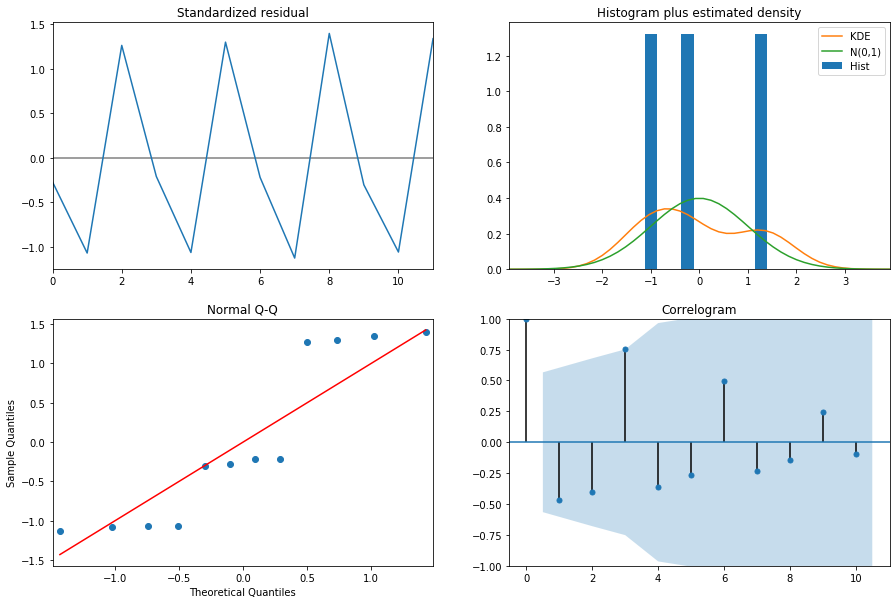

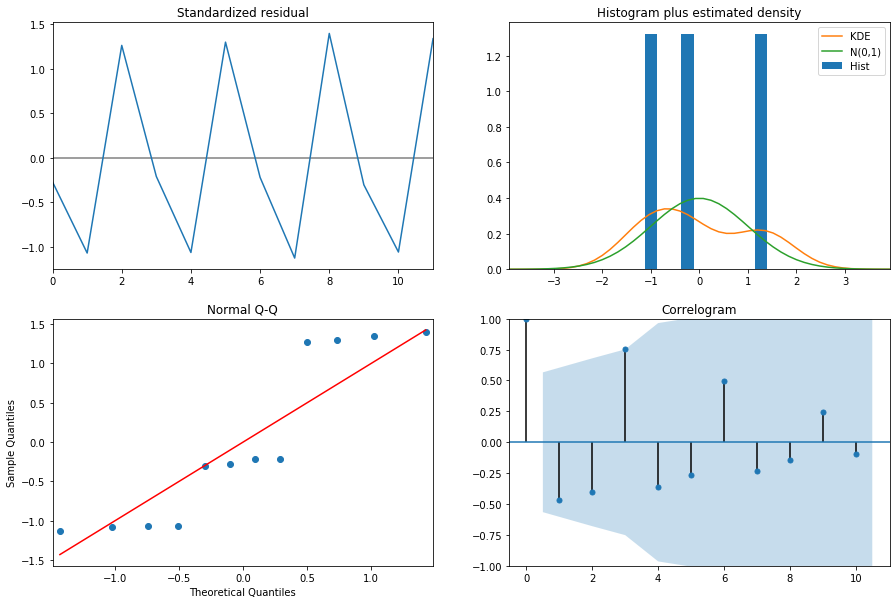

In [44]:
# view standardized residuals
model.plot_diagnostics()

In [45]:
# make your forecasts on the test
forecasts = model.predict(test.shape[0])
forecasts

array([   87.4633539 ,   604.41089693,  2170.63767006,  5774.30740158,
       12854.67174449, 25386.56881839, 45961.55696682, 77870.77063971])

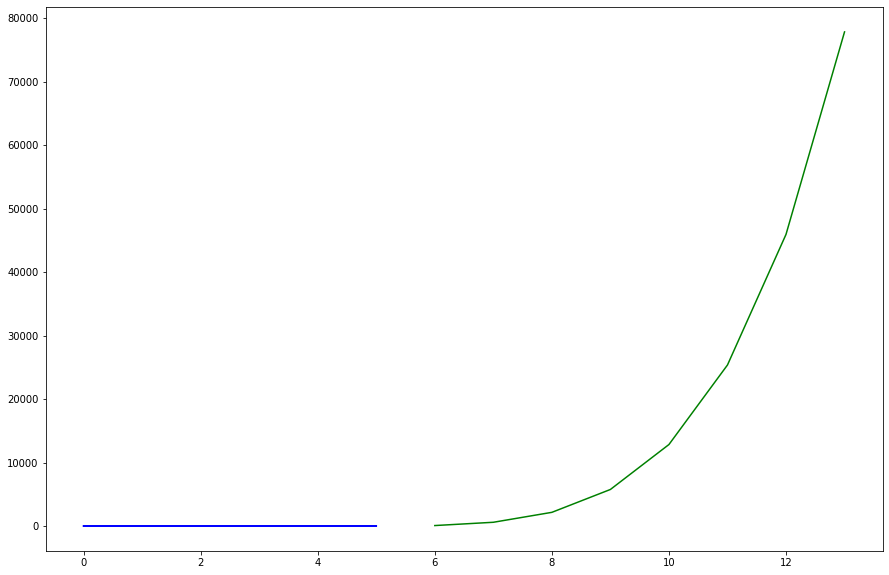

In [46]:
# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(data.shape[0])
plt.plot(x[:6], train, c='blue')
plt.plot(x[6:], forecasts, c='green')
plt.show()

**Model Evaluation (ARIMA)**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
pred = pred_df['pred']
mse = mean_squared_error(pred, test)
mape = mean_absolute_percentage_error(forecasts, test)

In [ ]:
# Plotting the data, forecasts, and confidence intervals
def plot_train_test_pred(train,test,pred_df):
    fig,ax = plt.subplots(figsize=(12,7))
    kws = dict(marker='o')
    
    ax.plot(train,label='Train',**kws)
    ax.plot(test,label='Test',**kws)
    ax.plot(pred_df['pred'],label='Prediction',ls='--',linewidth=3)

    ax.fill_between(x=pred_df.index,y1=pred_df['lower'],y2=pred_df['upper'],alpha=0.3)
    ax.set_title('Model Validation', fontsize=22)
    ax.legend(loc='upper left')
    fig.tight_layout()
    return fig,ax

In [47]:
def futureForecast_df(model, steps=7):
    futureForecast = model.summary_frame()#.get_forecast(steps=steps)
    #pred_df = futureForecast.conf_int()
    pred_df['pred'] = futureForecast.predicted_mean
    pred_df.columns = ['lower', 'upper', 'pred']
    return pred_df

# make future predictions for the next five years
pred_df = futureForecast_df(model, steps= 5)

AttributeError: 'ARIMA' object has no attribute 'summary_frame'

**Using the Prophet model**

In [48]:
from prophet import Prophet
#from prophet.plot import plot_plotly, plot_components_plotly

Importing plotly failed. Interactive plots will not work.


In [49]:
# remame the df in an acceptable format
data2 = data.copy().reset_index()
data2 = data2[['year','wage_gap']]
data2.columns = ['ds', 'y']
data2.head()

,ds,y
0,2004-01-01,3.95250
1,2005-01-01,2.98250
2,2006-01-01,3.91375
3,2007-01-01,4.18625
4,2008-01-01,5.31000


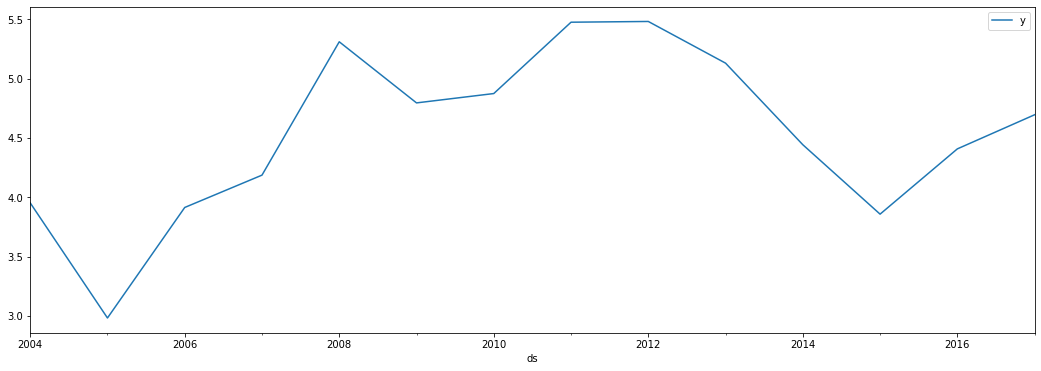

In [50]:
data2.plot(x='ds',y='y',figsize=(18,6))

In [51]:
# split to train and test set
print(data2.shape)
train=data2.iloc[:-2]
test=data2.iloc[-2:]
print(train.shape,test.shape)

(14, 2)
(12, 2) (2, 2)


In [52]:
model2 = Prophet()
model2.fit(train)

18:09:51 - cmdstanpy - INFO - Chain [1] start processing
18:12:22 - cmdstanpy - INFO - Chain [1] done processing
18:12:22 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


RuntimeError: Error during optimization: 

In [ ]:
future = model2.make_future_dataframe(periods=len(test), freq = 'y')
forecast2 = model2.predict(future)

In [ ]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [ ]:
# make predictions five years into the future
future2 = model2.make_future_dataframe(periods=5, freq = 'y')
forecast3 = model2.predict(future2)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [ ]:
# plot forecast for the next five years (prophet model)
model2.plot(forecast3)
plt.show()

**Model Evaluation (Prophet)**

In [ ]:
# Calculate MSE and MAPE 
mse = mean_squared_error(orecast2, test)
mape = mean_absolute_percentage_error(forecast2, test)

### Model Selection

In [ ]:
# use the best model of ARIMA to train the dataset
best_model = SARIMAX(data.values.ravel(),
                     order=model.order).fit()
                     
display(best_model.summary())

**Isaiah use the above or the one below**

In [ ]:
from pmdarima.pipeline import Pipeline
pipeline = Pipeline([('arima', pm.AutoARIMA(seasonal=True, m=1,
                           suppress_warnings=True,
                           trace=True))
])
pipeline.fit(data)

In [ ]:
#import pickle
# Serialize your model just like you would in scikit:
#with open('model.pkl', 'wb') as pkl:
    #pickle.dump(pipeline, pkl)
    
# Load it and make predictions seamlessly:
#with open('model.pkl', 'rb') as pkl:
    #mod = pickle.load(pkl)
    #print(mod.predict(15))